In [1]:
import numpy as np
import sklearn.manifold as skmfld
import sklearn.datasets as skdata
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Blobs

In [2]:
def make_blob(center, radius, num_samples=100):
    """
    Args:
        center: length 2 list specifying x and y coords
        radius: number specifying variance in both coords
        num_samples: integer specifying number of samples, default=100
    Returns:
        np.array with shape (num_samples, 2); centered at center with stddev=radius
    """
    x = np.random.normal(center[0], radius, num_samples)
    y = np.random.normal(center[1], radius, num_samples)
    return np.c_[x, y]

def make_labeled_blobs(centers, radii):
    """
    Args:
        centers: list of centers (list of pairs of numbers)
        radii: list of radii (list of numbers)
    Returns:
        np.array of all the blobs, with a "label" column
    """
    label = 0
    arr_to_return = None
    for c, r in zip(centers, radii):
        this_cluster = make_blob(c, r)
        #exercise
        #label_col = #column of correct size with value label everywhere
        label_col = label * np.ones(this_cluster.shape[0])
        this_cluster_labeled = np.c_[this_cluster, label_col]
        if arr_to_return is None:
            arr_to_return = this_cluster_labeled
        else:
            arr_to_return = np.r_[arr_to_return, this_cluster_labeled]
        label += 1
    return arr_to_return

(300, 3)


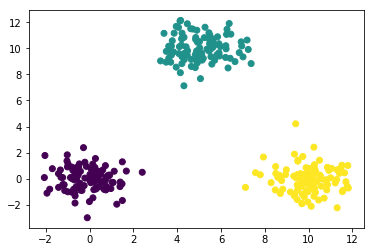

In [3]:
easyblobs = make_labeled_blobs([[0,0],[5,10],[10,0]], [1,1,1])
print easyblobs.shape
plt.scatter(easyblobs[:,0], easyblobs[:,1], c=easyblobs[:,2])

(300, 3)


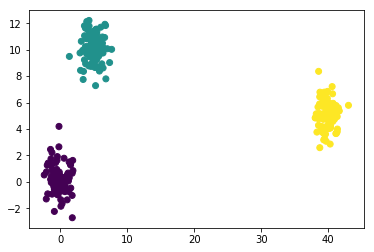

In [4]:
asymblobs = make_labeled_blobs([[0,0],[5,10],[40,5]], [1,1,1])
print asymblobs.shape
plt.scatter(asymblobs[:,0], asymblobs[:,1], c=asymblobs[:,2])

(300, 3)


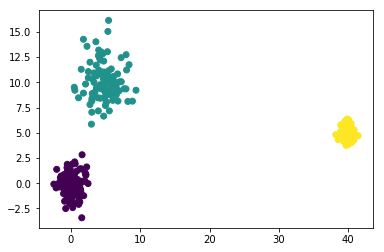

In [5]:
blobs_var_density = make_labeled_blobs([[0,0],[5,10],[40,5]], [1,2,.5])
print blobs_var_density.shape
plt.scatter(blobs_var_density[:,0], blobs_var_density[:,1], c=blobs_var_density[:,2])

(300, 3)


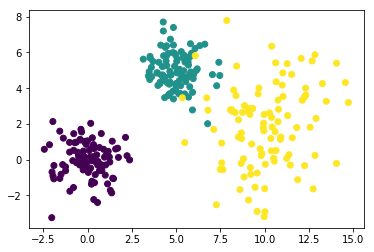

In [6]:
hardblobs = make_labeled_blobs([[0,0],[5,5],[10,2]], [1,1,2])
print hardblobs.shape
plt.scatter(hardblobs[:,0], hardblobs[:,1], c=hardblobs[:,2])

# Swiss Rolls

In [7]:
swiss_rolls = [skdata.make_swiss_roll(n_samples=n) for n in [100, 500, 1000, 5000]]

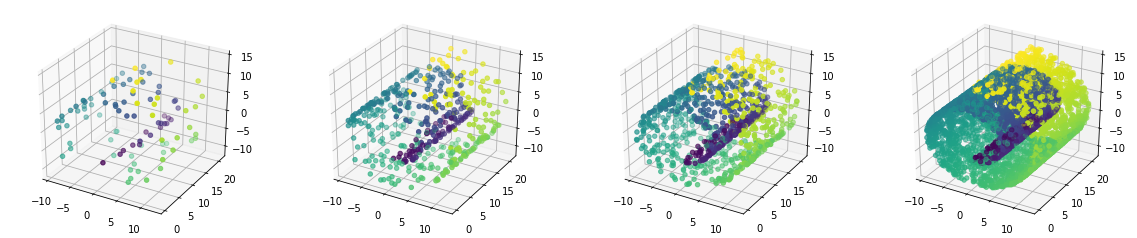

In [8]:
from mpl_toolkits.mplot3d import Axes3D
Axes3D
# fix sub-plots
fig = plt.figure(figsize=(20, 4))
for ind, sr in enumerate(swiss_rolls):
    roll, coord = sr
    ax = fig.add_subplot(1,len(swiss_rolls),ind+1, projection='3d')
    ax.scatter(roll[:,0], roll[:,1], roll[:,2], c=coord, cmap=plt.cm.viridis)

# PCA

In [9]:
import sklearn.decomposition as decomp
def try_pca(data, color):
    fig = plt.figure(figsize=(10,4))
    pca = decomp.PCA()
    data_red = pca.fit_transform(data)
    plt.scatter(data_red[:,0], data_red[:,1], c=color, cmap=plt.cm.viridis)

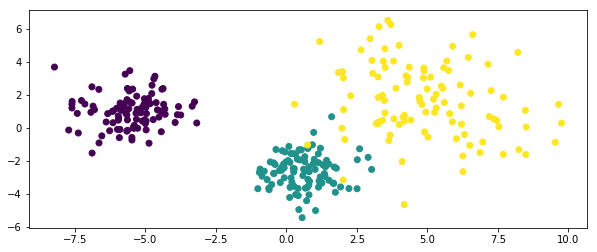

In [10]:
# PCA on the blobs is the identity
try_pca(hardblobs, hardblobs[:,2])

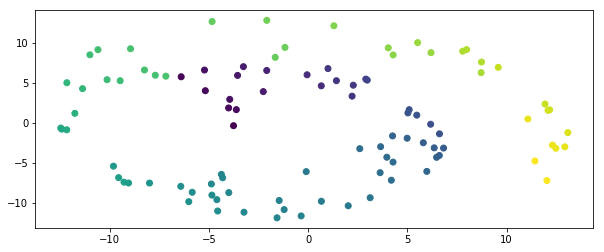

In [11]:
try_pca(swiss_rolls[0][0], swiss_rolls[0][1])

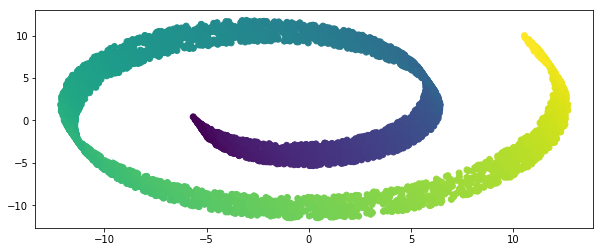

In [12]:
try_pca(swiss_rolls[3][0], swiss_rolls[3][1])

## Exercises:
1. PCA actually does all right on these rolls. Can you change the rolls to confuse it?
2. Make the sandwich example (two filled ellipses separated by a small distance orthogonal to their axes). Which algorithms will perform well on this example? Test it.

# MDS

In [13]:
def try_mds(data, color):
    fig = plt.figure(figsize=(10,4))
    mds = skmfld.MDS(n_components=2, n_jobs=-1, verbose=1)
    data_red = mds.fit_transform(data)
    plt.scatter(data_red[:,0], data_red[:,1], c=color, cmap=plt.cm.viridis)

breaking at iteration 61 with stress 34.4718827261
breaking at iteration 66 with stress 36.6460730012
breaking at iteration 79 with stress 33.1641241345
breaking at iteration 96 with stress 35.6506931734


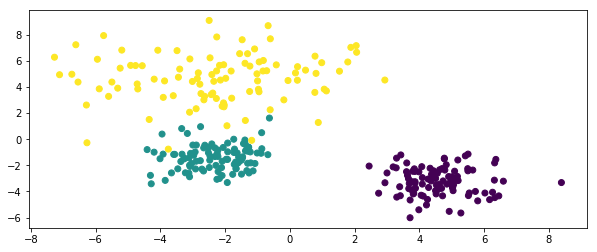

In [14]:
try_mds(hardblobs, color=hardblobs[:,2])

breaking at iteration 103 with stress 51508.7157575
breaking at iteration 112 with stress 51434.0390138
breaking at iteration 153 with stress 51470.2508376
breaking at iteration 227 with stress 76535.5443506


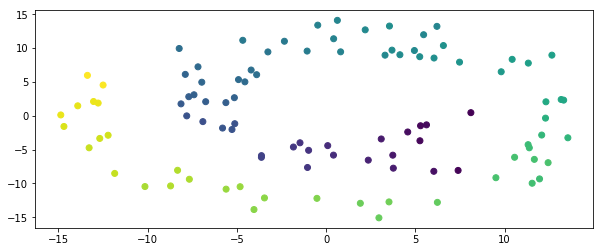

In [15]:
try_mds(swiss_rolls[0][0], color=swiss_rolls[0][1])

breaking at iteration 118 with stress 1332732.2907
breaking at iteration 204 with stress 1333359.07947
breaking at iteration 220 with stress 1333357.54512


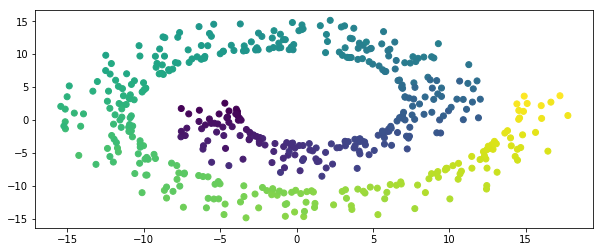

In [16]:
try_mds(swiss_rolls[1][0], color=swiss_rolls[1][1])

breaking at iteration 136 with stress 5794969.07713
breaking at iteration 195 with stress 5794968.6196
breaking at iteration 285 with stress 6979584.72235


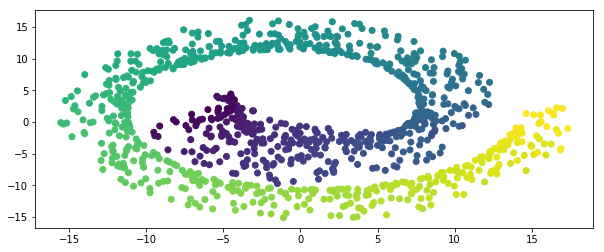

In [17]:
# Warning -- pretty slow
try_mds(swiss_rolls[2][0], color=swiss_rolls[2][1])

In [18]:
# Warning -- slow
# try_mds(swiss_rolls[3][0], color=swiss_rolls[3][1])

# Locally Linear Embedding
https://www.cs.nyu.edu/~roweis/lle/papers/lleintro.pdf

Exercises: 
1. Find the transition points between results.
2. Explain the results at low parameter choices.

In [19]:
def try_lle(data, color, neighbor_choices=(1,10,50,100,200)):
    fig = plt.figure(figsize=(20, 4))
    for ind, n_neighbors in enumerate(neighbor_choices):
        lle = skmfld.LocallyLinearEmbedding(n_neighbors, n_components=2, n_jobs=-1, eigen_solver='dense')
        data_red = lle.fit_transform(data)
        ax = fig.add_subplot(1,5,ind + 1)
        ax.scatter(data_red[:,0], data_red[:,1], c=color, cmap=plt.cm.viridis)

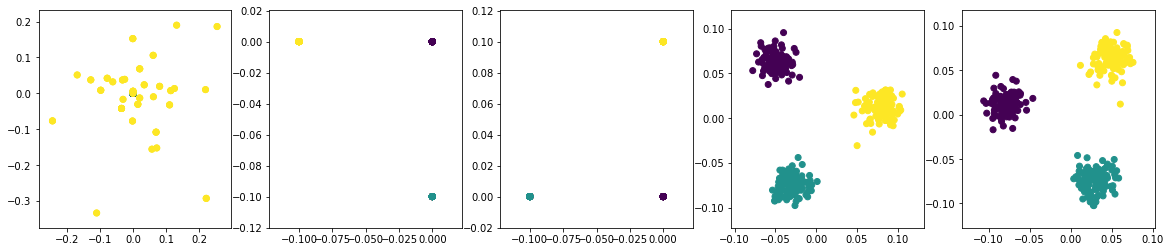

In [20]:
try_lle(easyblobs, easyblobs[:,2])

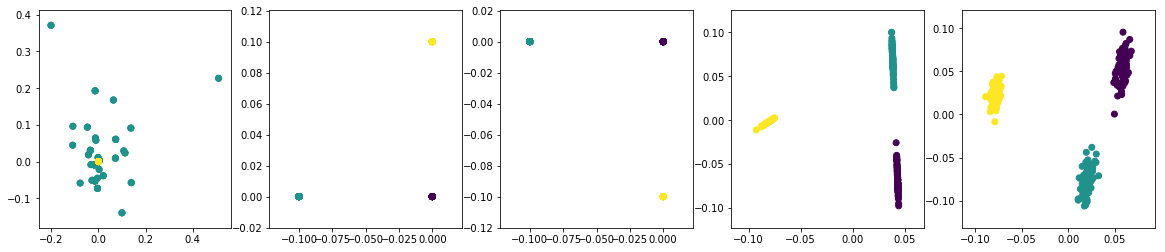

In [21]:
try_lle(asymblobs, asymblobs[:,2])

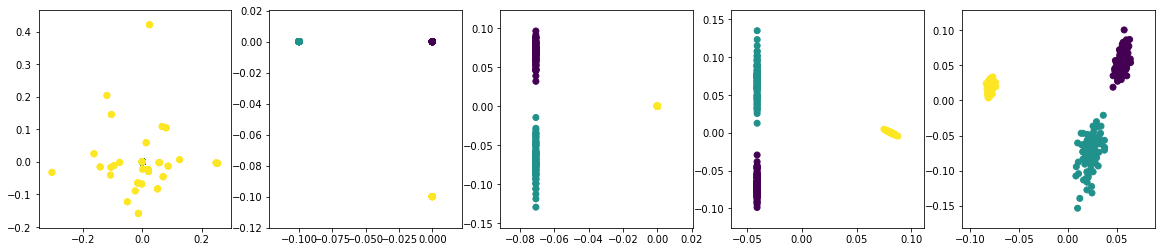

In [22]:
try_lle(blobs_var_density, blobs_var_density[:,2])

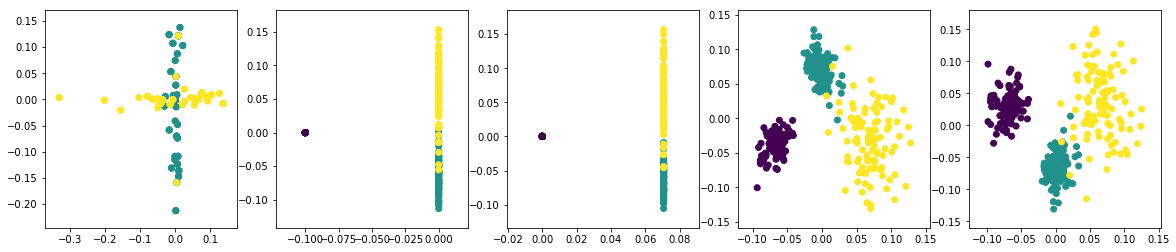

In [23]:
try_lle(hardblobs, hardblobs[:,2])

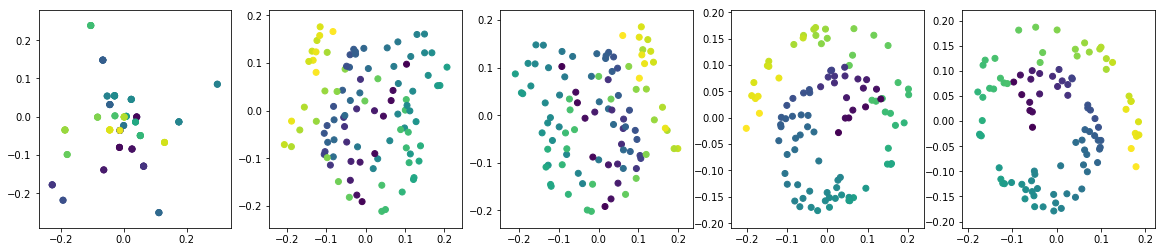

In [24]:
try_lle(swiss_rolls[0][0], color=swiss_rolls[0][1], neighbor_choices=(1,10,20,50,99))

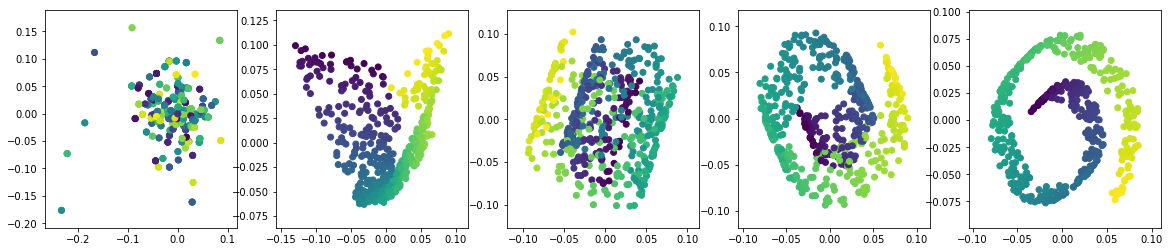

In [25]:
try_lle(swiss_rolls[1][0], color=swiss_rolls[1][1])

In [27]:
# Warning -- pretty slow
# try_lle(swiss_rolls[2][0], color=swiss_rolls[2][1])

In [28]:
# Warning -- slow
# try_lle(swiss_rolls[3][0], color=swiss_rolls[3][1])

# Isomap
http://web.mit.edu/cocosci/Papers/sci_reprint.pdf

Exercises: 
1. Find the transition points between results. 
2. Explain the results at low parameter choices.
3. Why do some of the blobs "blow up" before others in the last two blob examples?

In [29]:
def try_isomap(data, color, neighbor_choices=(1,10,50,100,200)):
    fig = plt.figure(figsize=(20, 4))
    for ind, n_neighbors in enumerate(neighbor_choices):
        isomap = skmfld.Isomap(n_neighbors, n_components=2, n_jobs=-1)
        data_red = isomap.fit_transform(data)
        ax = fig.add_subplot(1,5,ind + 1)
        ax.scatter(data_red[:,0], data_red[:,1], c=color, cmap=plt.cm.viridis)

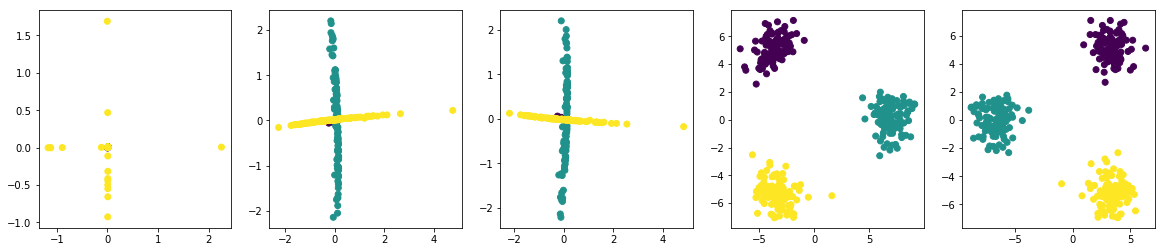

In [30]:
# Exercise: Find the transition point. Justify it.
try_isomap(easyblobs, easyblobs[:,2])

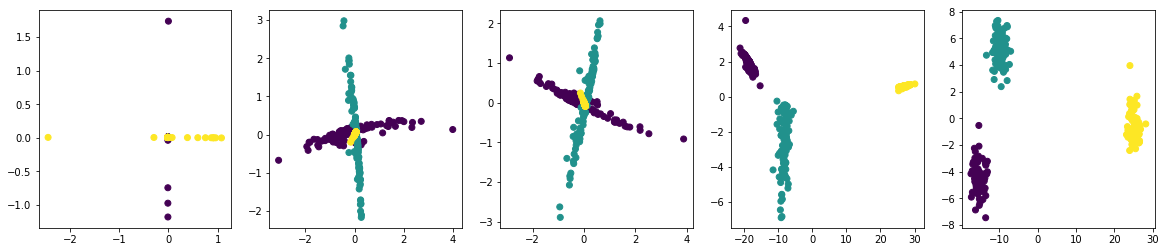

In [31]:
try_isomap(asymblobs, asymblobs[:,2])

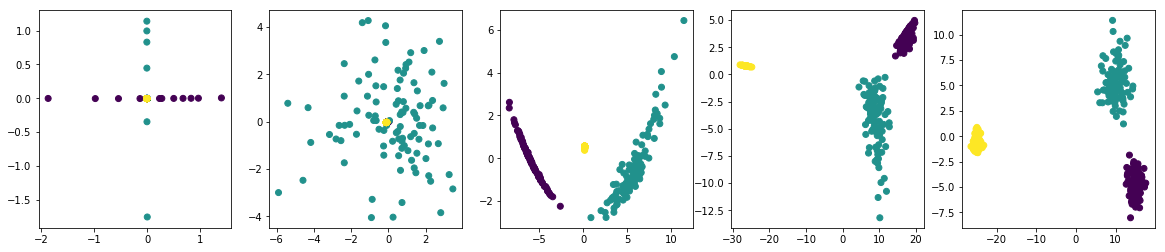

In [32]:
try_isomap(blobs_var_density, blobs_var_density[:,2])

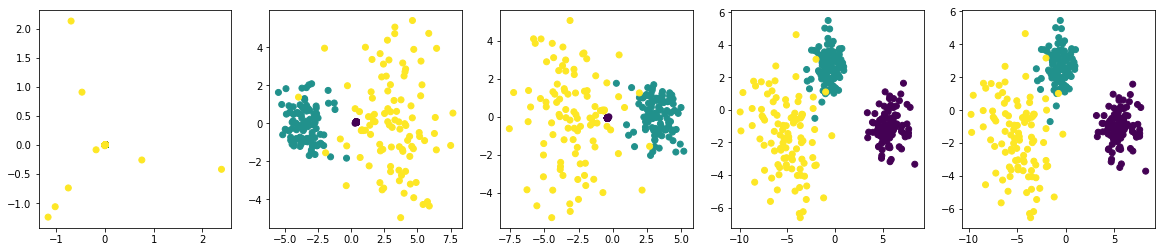

In [33]:
# Exercise: explain why the clusters "blow up" in the order they do.
try_isomap(hardblobs, hardblobs[:,2])

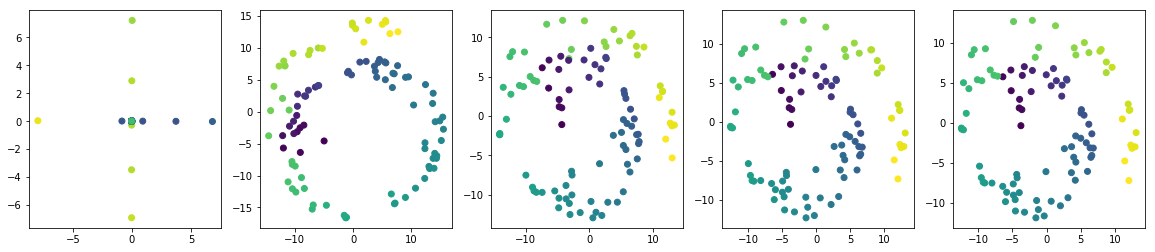

In [34]:
# Exercise: find a parameter choice that actually unrolls the swiss roll.
try_isomap(swiss_rolls[0][0], swiss_rolls[0][1], neighbor_choices=(1,10,50,80,99))

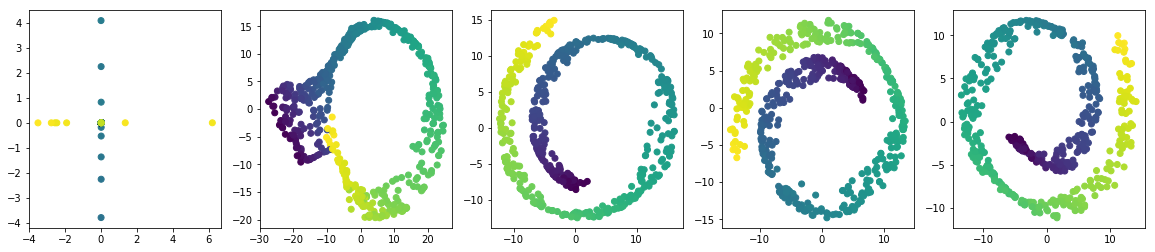

In [39]:
try_isomap(swiss_rolls[1][0], swiss_rolls[1][1], neighbor_choices=(1,10,50,100,200))

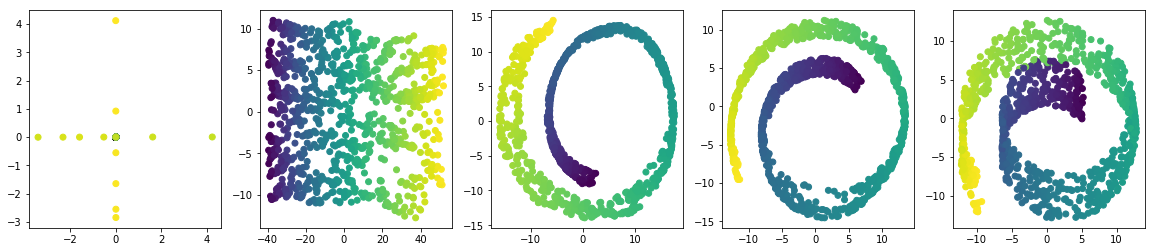

In [40]:
try_isomap(swiss_rolls[2][0], swiss_rolls[2][1], neighbor_choices=(1,10,50,200,500))

In [41]:
# Warning -- this is slow
# try_isomap(swiss_rolls[3][0], swiss_rolls[3][1], neighbor_choices=(1,10,100,200,500))

# Another algorithm, just for fun: t-SNE
https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf
but see also https://distill.pub/2016/misread-tsne/, which does not accomplish its title.

# Spheres

In [42]:
def make_sphere(dim=4, num_points=500):
    array = np.random.normal(0,1,[num_points, dim+1])
    print array.shape
    presph = pd.DataFrame(array)
    print presph.shape
    row_norms = presph.apply(np.linalg.norm, axis=1)
    print row_norms.shape
    sph = presph.apply(lambda x: x/row_norms, axis=0)
    print sph.shape
    return sph

In [49]:
sph2 = make_sphere(2)
# sph3 = make_sphere(3)
# sph4 = make_sphere()

(500, 3)
(500, 3)
(500,)
(500, 3)


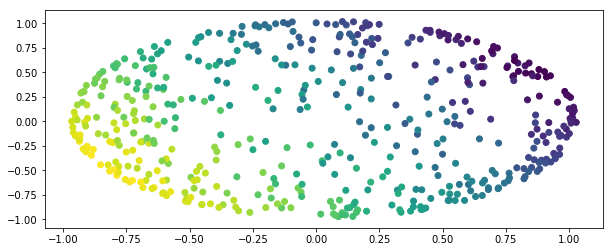

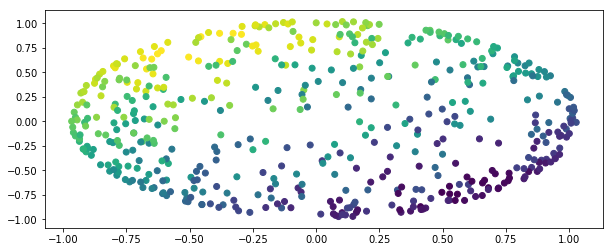

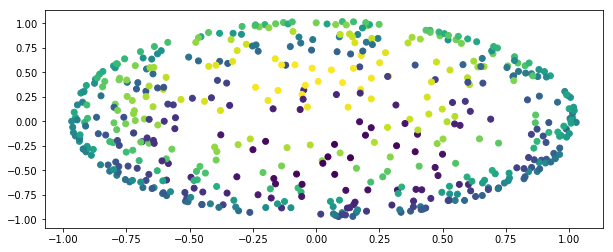

In [52]:
for x in range(3):
    try_pca(sph2, sph2[x])

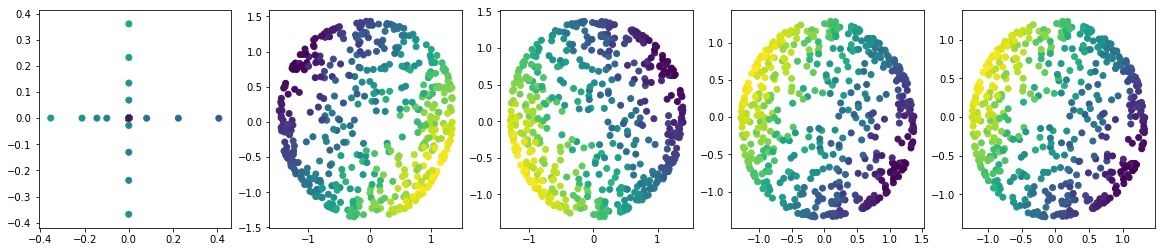

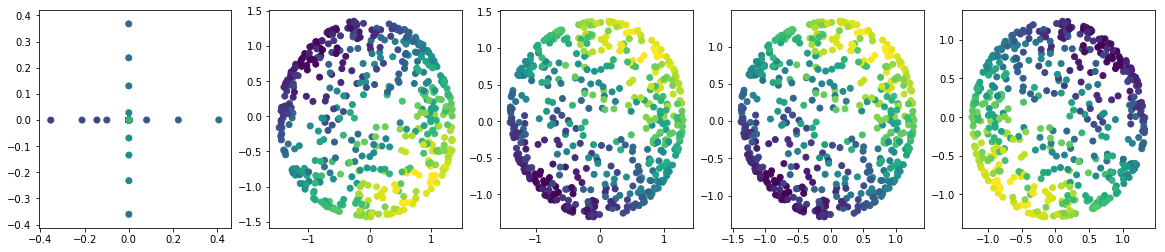

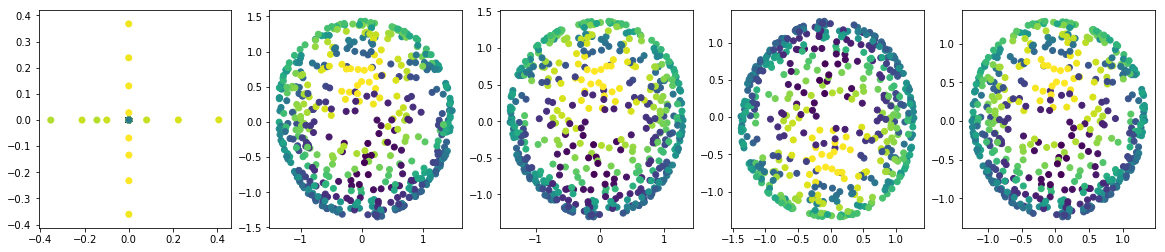

In [50]:
for x in range(3):
    try_isomap(sph2, sph2[x])

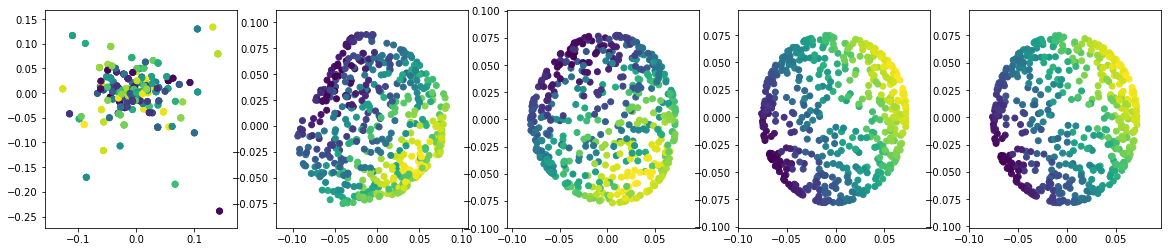

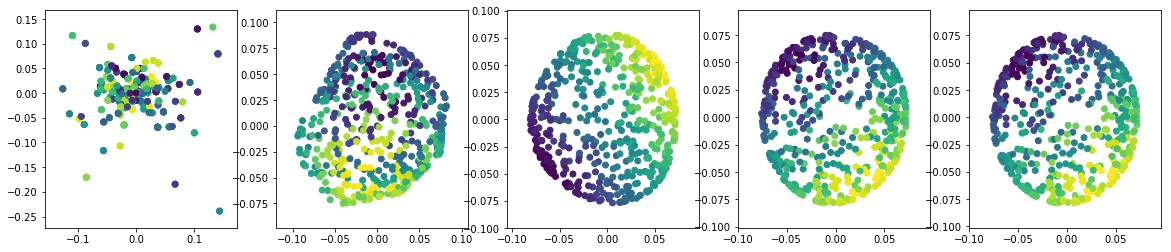

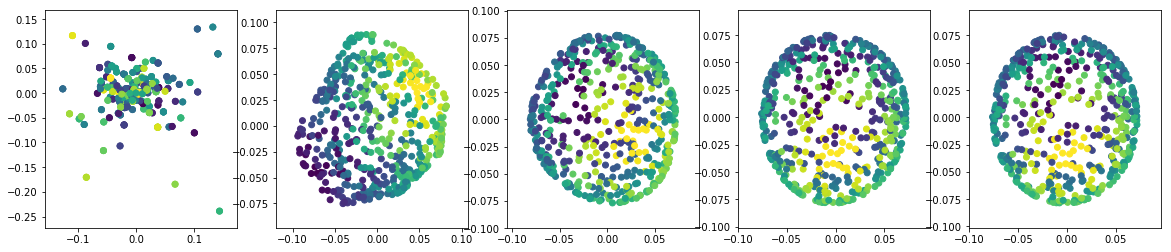

In [51]:
for x in range(3):
    try_lle(sph2, sph2[x])

# Persistent homology references
http://www.ams.org/journals/bull/2009-46-02/S0273-0979-09-01249-X/S0273-0979-09-01249-X.pdf
https://www.math.upenn.edu/~ghrist/preprints/barcodes.pdf